# **CV SELECTION SYSTEM**


### CONTENTS
###### *1) Install and Import Libraries*
###### *2) Loading Dataset*
###### *3) Data Analysis*
###### *4) Data Cleaning*
###### *5) Visualization (Graph and WordCloud)*
###### *6) Preparing the Data (Applying Count Vectorization)*
###### *7) Training Model (Naïve Bayes Classifier)*
###### *8) Evaluating Trained Naïve Bayes Classifier*


In [1]:
# Upload "resume_data.csv" from local system
from google.colab import files
uploaded = files.upload()

Saving resume_data.csv to resume_data.csv


## 1) INSTALL AND IMPORT LIBRARIES

In [2]:
# Installing wordcloud, gensim, nltk, seaborn, sklearn, numpy, matplotlib and pandas
!pip install wordcloud
!pip install gensim
!pip install nltk 
!pip install seaborn 
!pip install sklearn
!pip install numpy
!pip install matplotlib
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=ae39c741a401f7feb8215b2a0b1a6cc8b6ab3874add2c7b891a8f5fa6da50811
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
%matplotlib inline

## 2) LOADING DATASET

In [4]:
# Read resume_data.csv, create a dataframe object and display it
with open('resume_data.csv', 'r', encoding='latin-1') as f:
    resume_df = pd.read_csv(f)
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\nCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\nEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\nLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\nWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\nIndependent Consultant - Self-employed\nBurl...
...,...,...,...
120,resume_121,not_flagged,\nBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\nResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\nMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\nWaterbury VT - Email me on Indeed: indeed.co...


In [5]:
# Create new dataframe with just "resume_text" and "class" columns
resume_df = resume_df[['resume_text', 'class']]
resume_df

,resume_text,class
0,\nCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\nEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\nLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\nWilliston VT - Email me on Indeed: ind...,not_flagged
4,\nIndependent Consultant - Self-employed\nBurl...,flagged
...,...,...
120,\nBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\nResearch and Teaching Assistant - University...,not_flagged
122,\nMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\nWaterbury VT - Email me on Indeed: indeed.co...,flagged


## 3) DATA ANALYSIS

In [6]:
# Display summary of the dataframe
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [7]:
# Count no. of occurences of all unique values in "class" column
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [8]:
# Create new column "class" in dataframe converting existing column from string to int
# There are no null points in the dataset
pd.options.mode.chained_assignment = None
resume_df['class'] = [1 if x == 'flagged' else 0 for x in resume_df['class']]
resume_df

,resume_text,class
0,\nCustomer Service Supervisor/Tier - Isabella ...,0
1,\nEngineer / Scientist - IBM Microelectronics ...,0
2,\nLTS Software Engineer Computational Lithogra...,0
3,TUTOR\nWilliston VT - Email me on Indeed: ind...,0
4,\nIndependent Consultant - Self-employed\nBurl...,1
...,...,...
120,\nBrattleboro VT - Email me on Indeed: indeed....,0
121,\nResearch and Teaching Assistant - University...,0
122,\nMedical Coder - Highly Skilled - Entry Level...,0
123,\nWaterbury VT - Email me on Indeed: indeed.co...,1


## 4) DATA CLEANING

In [9]:
# This code preprocesses the text data in the 'resume_text' column of the 'resume_df' DataFrame 
# by removing unnecessary words and punctuation, tokenizing the text,  
# removing stop words and short words and joining the remaining tokens back into a string.
# Remove unnecessary words from dataset and prints the "resume_df" DataFrame
nltk.download('punkt')
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

def preprocess(text):
    text = text.replace('\r', '')
    text = re.sub(r'[^\w\s]', '', text)
    tokens = gensim.utils.simple_preprocess(text)
    tokens = [token for token in tokens if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words]
    return ' '.join(tokens)

resume_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,resume_text,class
0,\nCustomer Service Supervisor/Tier - Isabella ...,0
1,\nEngineer / Scientist - IBM Microelectronics ...,0
2,\nLTS Software Engineer Computational Lithogra...,0
3,TUTOR\nWilliston VT - Email me on Indeed: ind...,0
4,\nIndependent Consultant - Self-employed\nBurl...,1
...,...,...
120,\nBrattleboro VT - Email me on Indeed: indeed....,0
121,\nResearch and Teaching Assistant - University...,0
122,\nMedical Coder - Highly Skilled - Entry Level...,0
123,\nWaterbury VT - Email me on Indeed: indeed.co...,1


In [10]:
# Apply preprocess function to "resume_text" column and create a new column called "cleaned"
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)
resume_df

,resume_text,class,cleaned
0,\nCustomer Service Supervisor/Tier - Isabella ...,0,customer service supervisortier isabella catal...
1,\nEngineer / Scientist - IBM Microelectronics ...,0,engineer scientist ibm division westford eca w...
2,\nLTS Software Engineer Computational Lithogra...,0,lts software engineer computational lithograph...
3,TUTOR\nWilliston VT - Email me on Indeed: ind...,0,tutor williston work experience tutor dickinso...
4,\nIndependent Consultant - Self-employed\nBurl...,1,independent consultant selfemployed burlington...
...,...,...,...
120,\nBrattleboro VT - Email me on Indeed: indeed....,0,brattleboro indeedcomr bcc skilled presenter t...
121,\nResearch and Teaching Assistant - University...,0,research teaching assistant university vermont...
122,\nMedical Coder - Highly Skilled - Entry Level...,0,medical coder highly skilled entry level sudbu...
123,\nWaterbury VT - Email me on Indeed: indeed.co...,1,waterbury indeedcomrb bec willing relocate aut...


In [11]:
# Retrieves the cleaned text of the first resume in the DataFrame
resume_df.at[0, 'cleaned']

'customer service supervisortier isabella catalog company south burlington indeedcomr aecf work experience customer service supervisortier isabella catalog company shelburne august present customer servicevisual set displaywebsite maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing catalog merchandise set display sample merchandise catalog library customer pickup area facility website cleanup adding images type product information proofreading administrative assistant events services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travellogistics catering interior d

## 5) VISUALIZATION (GRAPH AND WORDCLOUD)

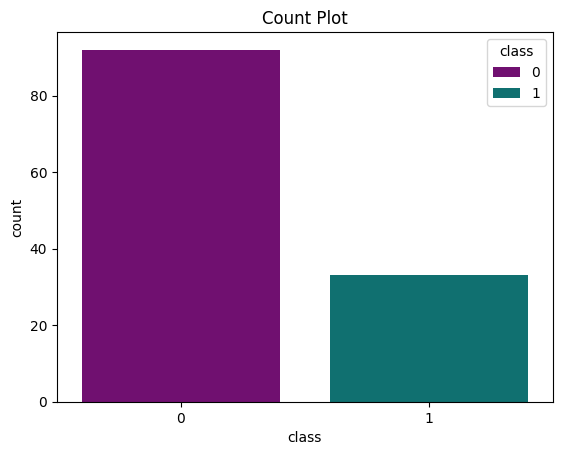

In [12]:
# Plot counts of sample labelled as 1(flagged) and 0(not flagged)
sns.countplot(x='class', hue='class', data=resume_df, dodge=False, palette=['purple', 'teal'])
plt.title('Count Plot')
plt.show()

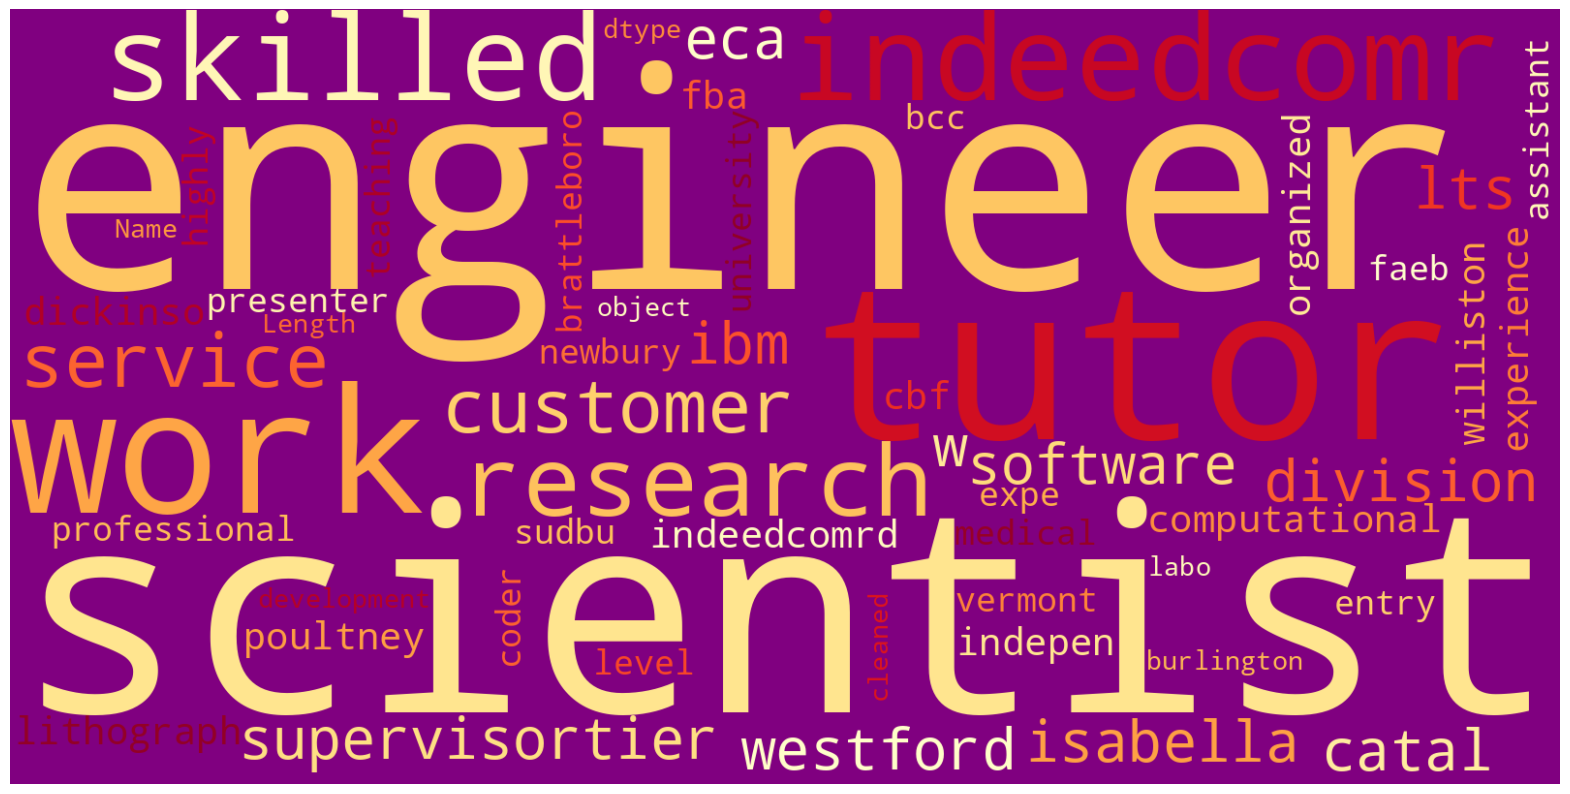

In [13]:
# Create a wordcloud which is visual representation of most frequently occuring words where size represents frequency
# This is for Class 0(Not Flagged)
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words, colormap='YlOrRd', background_color='purple').generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

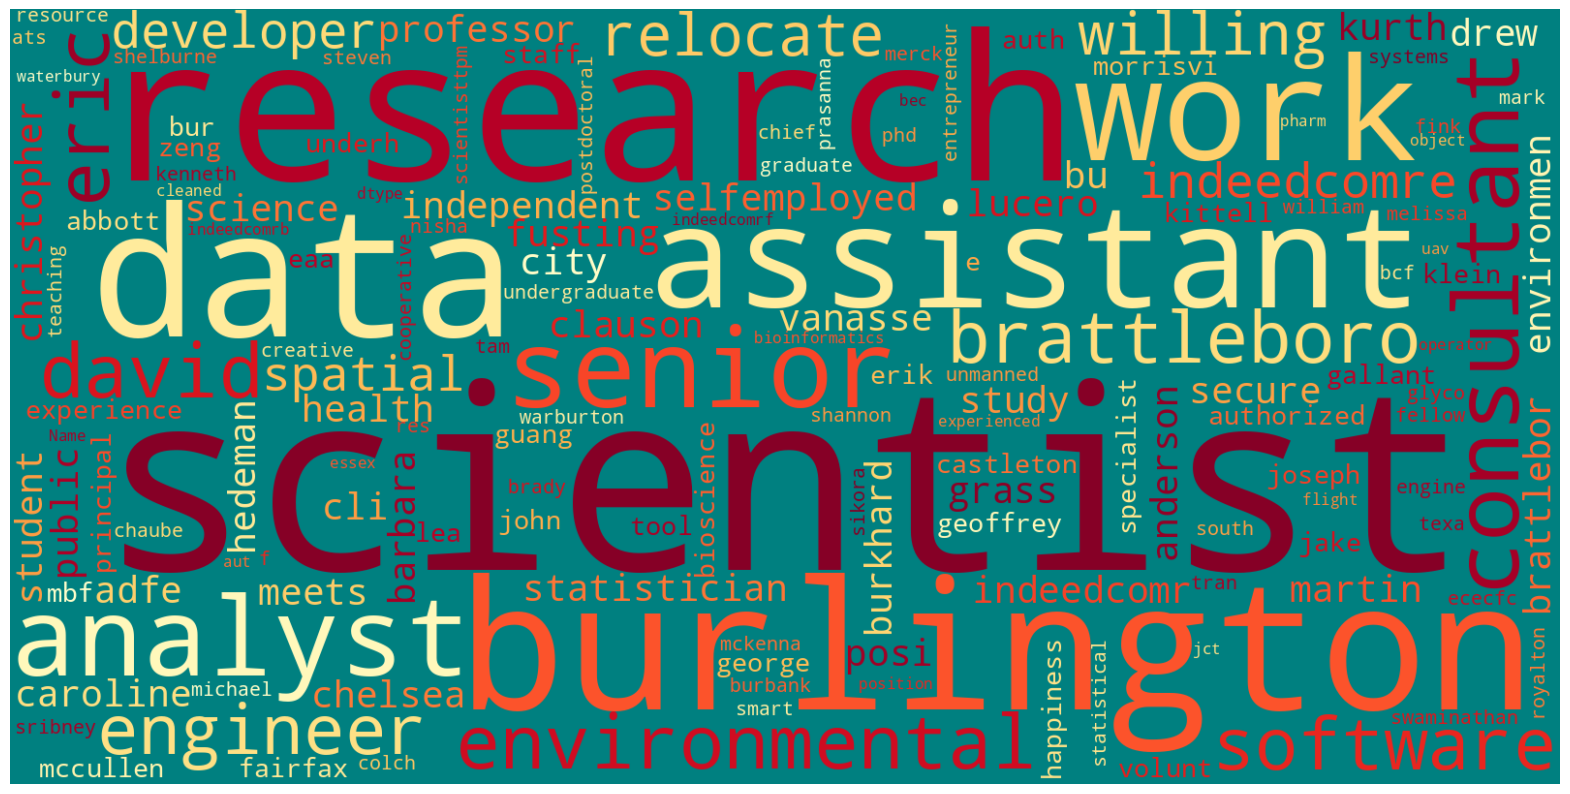

In [14]:
# Wordcloud for Class 1(Flagged)
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words, colormap='YlOrRd', background_color='teal').generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 6) PREPARING THE DATA (APPLYING COUNT VECTORIZATION)

In [15]:
# Transform the preprocessed text data in the 'cleaned' column of the 'resume_df' DataFrame into a matrix of token counts
# This is done for training the model
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

print(list(vectorizer.get_feature_names_out()))

['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aakeroõ_y', 'aanpcp', 'aaron', 'aas', 'abbott', 'abd', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'absence', 'absorbance', 'abstract', 'abstracted', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'academia', 'academic', 'academics', 'academy', 'acadia', 'acaeefbc', 'accelerate', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed', 'acetylsalicylic', 'acf', 'acg', 'ache

In [16]:
# Processed data
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 7) TRAINING MODEL (NAIVE BAYES CLASSIFER)

In [17]:
# Training the model(Naive Bayes Classifier)
X = countvectorizer
y = resume_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Bayes_clf = MultinomialNB(alpha=3)
Bayes_clf.fit(X_train, y_train)

MultinomialNB(alpha=3)

## 8) EVALUATING TRAINED NAIVE BAYES CLASSIFIER

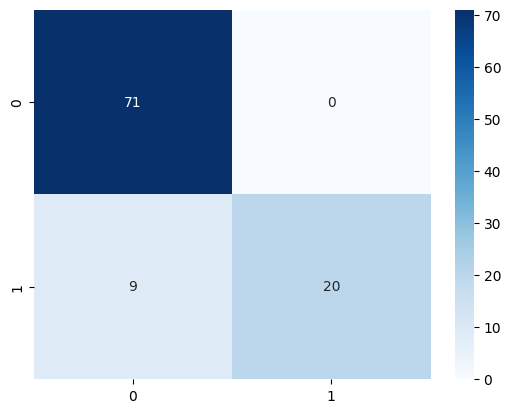

In [18]:
# Plotting confusion matrix
# This is for training data
y_pred_train = Bayes_clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

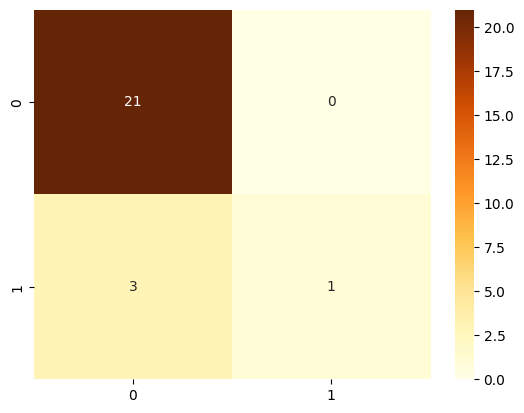

In [19]:
# Model performs well on training data as it classified all of the points correctly
# This is for test data
y_pred_test = Bayes_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.show()

In [20]:
# Print report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.25      0.40         4

    accuracy                           0.88        25
   macro avg       0.94      0.62      0.67        25
weighted avg       0.90      0.88      0.85        25



In [21]:
# Print accuracy on training and testing dataset
print(f"Accuracy on Train Dataset = {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy on Test Dataset = {accuracy_score(y_test, y_pred_test)}")

Accuracy on Train Dataset = 0.91
Accuracy on Test Dataset = 0.88


In [22]:
# Print final outputs
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"F1: {f1_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")

Accuracy: 0.88
F1: 0.4
Precision: 1.0
Recall: 0.25
